In [ ]:
# import all usfull libraries.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas library for data manipulation
import numpy as np # Import numpy library for numerical operations
import matplotlib.pyplot as plt # Import matplotlib for plotting
import seaborn as sns # Import seaborn for advanced plotting
import re # Import regular expression library for text manipulation
import string # Import string library for string operations
import nltk # Import nltk library for natural language processing
from nltk.corpus import stopwords # Import stopwords from nltk
from nltk.stem import PorterStemmer # Import PorterStemmer for stemming
from nltk.stem import WordNetLemmatizer # Import WordNetLemmatizer for lemmatizationimport re
import string
import nltk

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import nltk
import string
import re
from nltk.tokenize import word_tokenize
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import math
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/all ml/heart_attack_risk_dataset.csv")

In [ ]:
data.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate


In [ ]:
data.shape

(50000, 20)

Age
75    768
80    755
30    753
34    742
61    738
     ... 
48    650
81    649
51    644
87    642
37    640
Name: count, Length: 72, dtype: int64


<Axes: xlabel='Age', ylabel='count'>

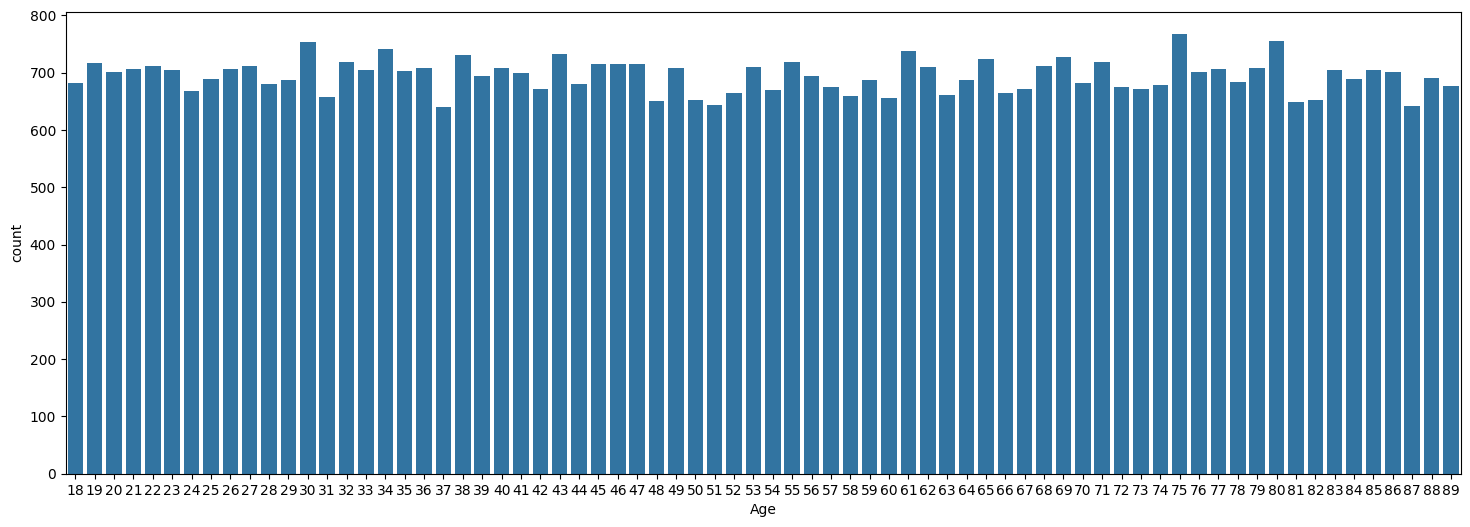

In [ ]:
print(data['Age'].value_counts()) # Access the 'y' Series directly
plt.figure(figsize=(18, 6))
sns.countplot(x=data['Age'], data=data)

Age
75    768
80    755
30    753
34    742
61    738
     ... 
48    650
81    649
51    644
87    642
37    640
Name: count, Length: 72, dtype: int64


<Axes: xlabel='count', ylabel='Age'>

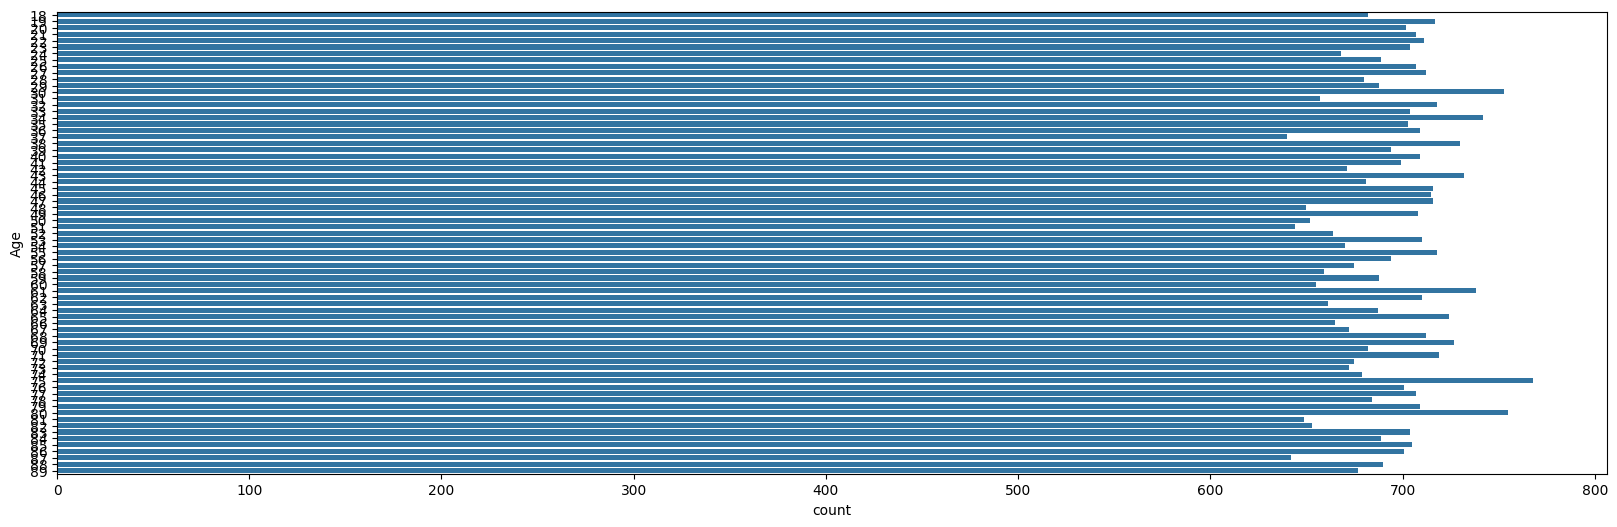

In [ ]:

print(data.Age.value_counts())
plt.figure(figsize=(20, 6))
sns.countplot(y='Age', data=data)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalassemia           

In [ ]:
data.isna().sum()

,0
Age,0
Gender,0
Smoking,0
Alcohol_Consumption,0
Physical_Activity_Level,0
BMI,0
Diabetes,0
Hypertension,0
Cholesterol_Level,0
Resting_BP,0


In [ ]:
#x=data.iloc[0:1].values
#y=data.iloc[:-1:].values

In [ ]:
#x.shape

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])


#label_encoder = LabelEncoder()
#data['gender']=le.fit_transform(data['gender'])
#data['Physical_Activity_Level']=le.fit_transform(data['Physical_Activity_Level'])
#data[' Stress_Level  ']=le.fit_transform(data[' Stress_Level  '])
#data['Chest_Pain_Type ']=le.fit_transform(data['Chest_Pain_Type '])
#data['Thalassemia']=le.fit_transform(data['Thalassemia'])
#data['ECG_Results ']=le.fit_transform(data['ECG_Results '])
#data['Heart_Attack_Risk ']=le.fit_transform(data['Heart_Attack_Risk '])

In [ ]:
data.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,0,1,0,2,34.61,1,0,152.1,171,85,0,2,2,2,0,1,0,114,1
1,32,1,0,0,2,22.75,0,0,166.8,126,103,0,1,0,1,0,2,0,173,2
2,89,1,0,1,2,35.32,0,0,272.3,123,127,0,1,3,2,0,2,0,109,1
3,78,1,0,1,2,18.23,1,0,237.7,144,125,0,1,3,0,1,0,0,129,1
4,38,0,1,0,2,19.82,0,0,207.7,123,107,0,0,0,2,0,2,0,124,2


In [ ]:
balanced_data = pd.DataFrame()

# Iterate over each class
for class_label in data ['Heart_Attack_Risk'].unique():
    class_data =data [data['Heart_Attack_Risk'] == class_label]
    if len(class_data) >= 18000:
        sampled_data = class_data.sample(n=18000, random_state=42, replace=False)
    else:
       sampled_data = class_data.sample(n=18000, random_state=42, replace=True)

    balanced_data = pd.concat([balanced_data, sampled_data])

# Reset the index of the balanced dataset
balanced_data.reset_index(drop=True, inplace=True)

# Display the balanced dataset
print(balanced_data['Heart_Attack_Risk'].value_counts())

data=balanced_data

Heart_Attack_Risk
1    18000
2    18000
0    18000
Name: count, dtype: int64


In [ ]:
data.shape

(54000, 20)

In [ ]:
y=data['Heart_Attack_Risk']
x=data.drop(columns=['Heart_Attack_Risk']) #independant  variable or input
#slipt
X_train,X_temp,y_train,y_temp=train_test_split(x, y, test_size=0.4, stratify=y, random_state=42)

X_test, X_cv, y_test, y_cv = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

Heart_Attack_Risk
1    18000
2    18000
0    18000
Name: count, dtype: int64


<Axes: xlabel='Heart_Attack_Risk', ylabel='count'>

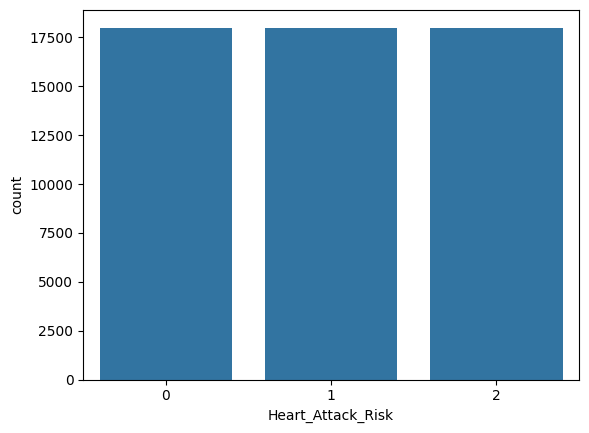

In [ ]:

print(y.value_counts()) # Access the 'y' Series directly
sns.countplot(x=y, data=data) # Pass the 'y' Series to the x argument of sns.countplot, and the DataFrame 'data' to the data argument

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_cv.shape)

(32400, 19)
(10800, 19)
(10800, 19)


In [ ]:
#rmse

def rmse(actual, predicted) :
  return np.sqrt(((actual - predicted) ** 2).mean())

def rmse_to_prob(actual, predicted, max_rmse) :
  rmse_value = rmse(actual, predicted)
  probability = 1 - (rmse_value / max_rmse)

  return max(0, min(probability, 1))

# knn algorithm

In [ ]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)



# Predict on the test set and cross-validation set
y_test_pred = knn.predict(X_test)
y_cv_pred = knn.predict(X_cv)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)

0.43194444444444446
0.43796296296296294
0.43194444444444446
0.43796296296296294
0.43194444444444446
0.43796296296296294


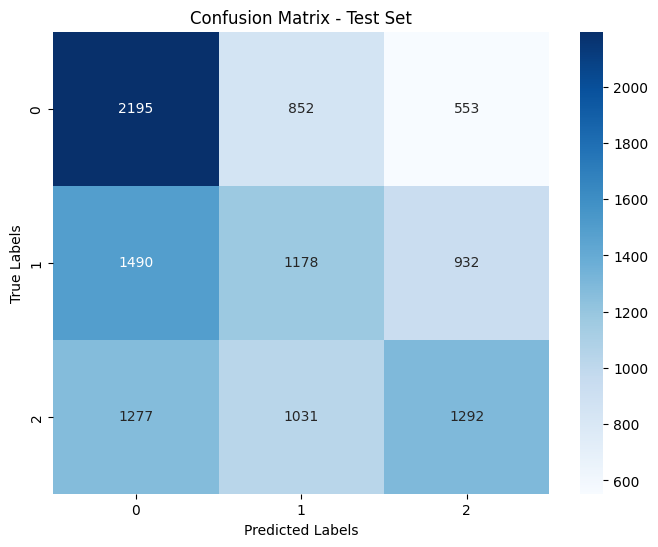

In [ ]:
 #Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Define the range of k values
k = list(range(1, 50, 2))

train_accuracy = []
cv_accuracy = []

# Loop over the range of k values to tune hyperparameter
for i in k:

    knn = KNeighborsClassifier(n_neighbors=i)

    # Train the classifier
    knn.fit(X_train, y_train)

    # Predict on train and CV sets
    y_train_pred= knn.predict(X_train)
    y_cv_pred = knn.predict(X_cv)

    # Calculate accuracy
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    cv_accuracy.append(accuracy_score(y_cv, y_cv_pred))


# Find the optimal k based on maximum CV accuracy
optimal_k = k[cv_accuracy.index(max(cv_accuracy))]


# Apply log transformation to k for plotting
k_log = [math.log(x) for x in k]
print(optimal_k)

1


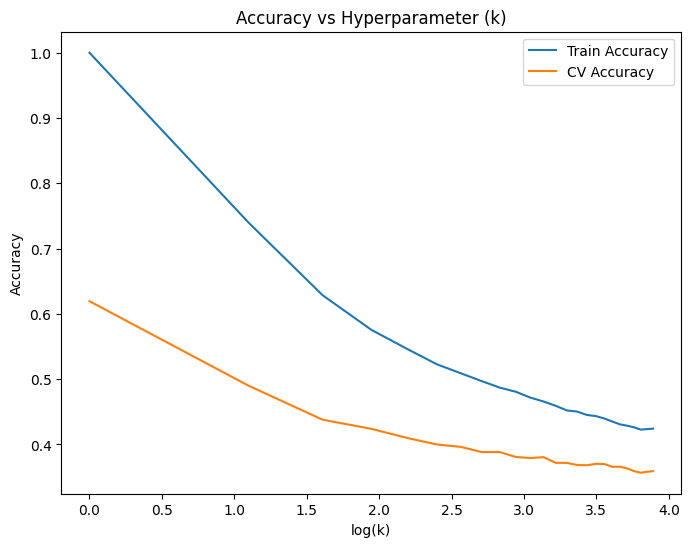

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(k_log, train_accuracy, label='Train Accuracy')
plt.plot(k_log, cv_accuracy, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (k)')
plt.xlabel('log(k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
 #Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Predict on the test set and cross-validation set
y_train_pred =knn.predict(X_train)
y_test_pred = knn.predict(X_test)
y_cv_pred = knn.predict(X_cv)

# Evaluate the model
train_accuracy_knn= accuracy_score(y_train,y_train_pred)
test_accuracy_knn = accuracy_score(y_test, y_test_pred)
cv_accuracy_knn = accuracy_score(y_cv, y_cv_pred)

train_precision_knn= precision_score(y_train,y_train_pred, average='macro')
test_precision_knn = precision_score(y_test, y_test_pred, average='macro')
cv_precision_knn = precision_score(y_cv, y_cv_pred, average='macro')

train_recall_knn= recall_score(y_train,y_train_pred, average='macro')
test_recall_knn = recall_score(y_test, y_test_pred, average='macro')
cv_recall_knn = recall_score(y_cv, y_cv_pred, average='macro')

max_rmse = np.max(y_test)-np.min(y_test)
res =rmse_to_prob(y_test, y_test_pred, max_rmse)

In [ ]:
print(train_accuracy_knn)
print(test_accuracy_knn)
print(cv_accuracy_knn)
print(train_precision_knn)
print(test_precision_knn)
print(cv_precision_knn)
print(train_recall_knn)
print(test_recall_knn)
print(cv_recall_knn)
print(max_rmse)

1.0
0.6114814814814815
0.6194444444444445
1.0
0.6051026493969943
0.6128596150925976
1.0
0.6114814814814814
0.6194444444444445
2


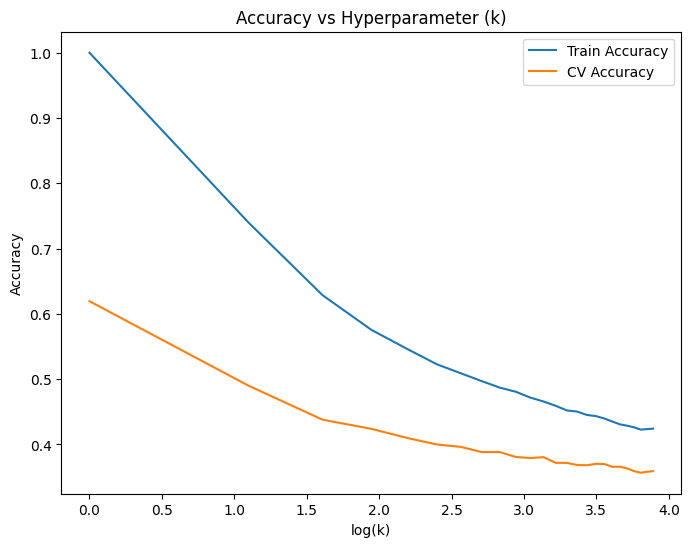

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(k_log, train_accuracy, label='Train Accuracy')
plt.plot(k_log, cv_accuracy, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (k)')
plt.xlabel('log(k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall','RMSE']
knn= pd.DataFrame([['KNN',train_accuracy_knn,test_accuracy_knn,cv_accuracy_knn,train_precision_knn,test_precision_knn,cv_precision_knn,train_recall_knn,test_recall_knn,cv_recall_knn,res]],columns=col)
#results.loc[1] = new

In [ ]:
knn

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,KNN,1.0,0.611481,0.619444,1.0,0.605103,0.61286,1.0,0.611481,0.619444,0.601769


# navie bayes

In [ ]:
# Train the navie bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Predict on the test set and cross-validation set
y_test_pred = mnb.predict(X_test)
y_cv_pred = mnb.predict(X_cv)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)

0.3301851851851852
0.3350925925925926
0.3301851851851852
0.3350925925925926
0.3301851851851852
0.3350925925925926


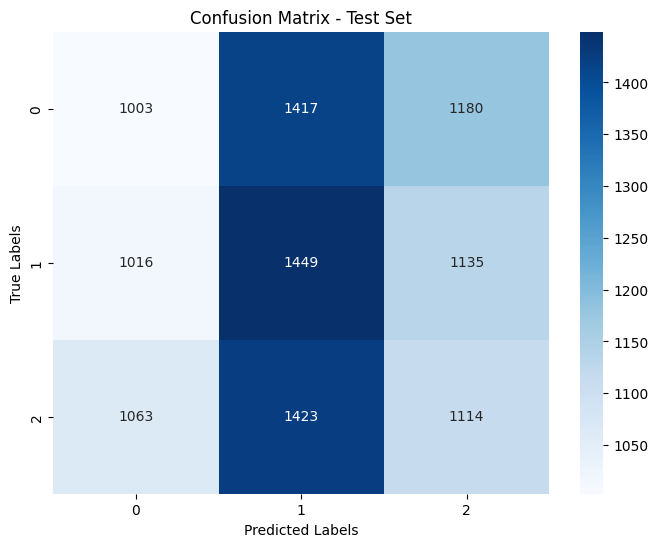

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in alpha:
    clf = MultinomialNB(alpha = i)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_cv_pred = clf.predict(X_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred))

optimal_alpha= alpha[cv_auc.index(max(cv_auc))]
alpha=[math.log(x) for x in alpha]

In [ ]:
print(optimal_alpha)

1000


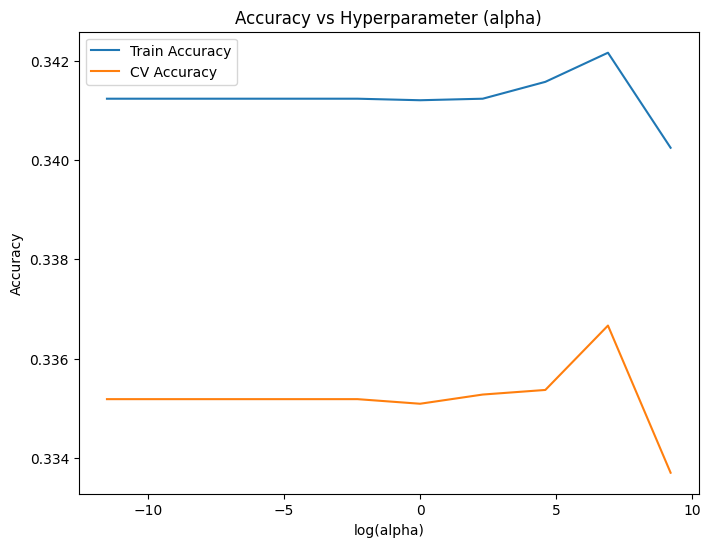

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(alpha, train_auc, label='Train Accuracy')
plt.plot(alpha, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (alpha)')
plt.xlabel('log(alpha)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
clf = MultinomialNB(alpha = optimal_alpha )
clf.fit(X_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_cv_pred= clf.predict(X_cv)

# Evaluate the model
train_accuracy_nb= accuracy_score(y_train,y_train_pred)
test_accuracy_nb = accuracy_score(y_test, y_test_pred)
cv_accuracy_nb = accuracy_score(y_cv, y_cv_pred)

train_precision_nb= precision_score(y_train,y_train_pred, average='micro')
test_precision_nb = precision_score(y_test, y_test_pred, average='micro')
cv_precision_nb = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_nb= recall_score(y_train,y_train_pred, average='micro')
test_recall_nb = recall_score(y_test, y_test_pred, average='micro')
cv_recall_nb = recall_score(y_cv, y_cv_pred, average='micro')
max_rmse = np.max(y_test)-np.min(y_test)
res =rmse_to_prob(y_test, y_test_pred, max_rmse)

In [ ]:
print(train_accuracy_nb)
print(test_accuracy_nb)
print(cv_accuracy_nb)
print(train_precision_nb)
print(test_precision_nb)
print(cv_precision_nb)
print(train_recall_nb)
print(test_recall_nb)
print(cv_recall_nb)
print(max_rmse)

0.3421604938271605
0.332037037037037
0.33666666666666667
0.3421604938271605
0.332037037037037
0.33666666666666667
0.3421604938271605
0.332037037037037
0.33666666666666667
2


In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall','RMSE']
nb = pd.DataFrame([['nb',train_accuracy_nb,test_accuracy_nb,cv_accuracy_nb,train_precision_nb,test_precision_nb,cv_precision_nb,train_recall_nb,test_recall_nb,cv_recall_nb,res]],columns=col)
#results.loc[1] = new

In [ ]:
nb

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,nb,0.34216,0.332037,0.336667,0.34216,0.332037,0.336667,0.34216,0.332037,0.336667,0.430054





# Logistic RegressionL1


In [ ]:
# Train the Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



log = LogisticRegression(penalty='l1',solver='liblinear')
log.fit(X_train, y_train)

# Predict on the test set and cross-validation set
y_test_pred = log.predict(X_test)
y_cv_pred = log.predict(X_cv)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)

0.3399074074074074
0.33490740740740743
0.3399074074074074
0.33490740740740743
0.3399074074074074
0.33490740740740743


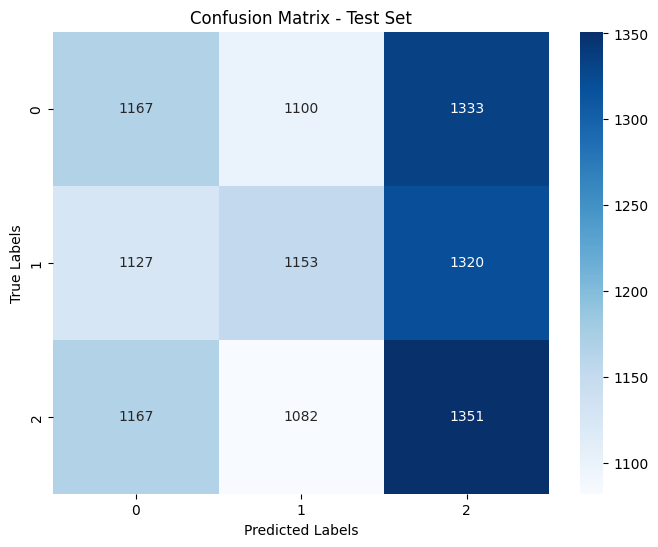

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
c= [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l1',C=i,solver='liblinear')
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_cv_pred = clf.predict(X_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred))

optimal_c= c[cv_auc.index(max(cv_auc))]
c=[math.log(x) for x in c]

In [ ]:
print(optimal_c)

0.001


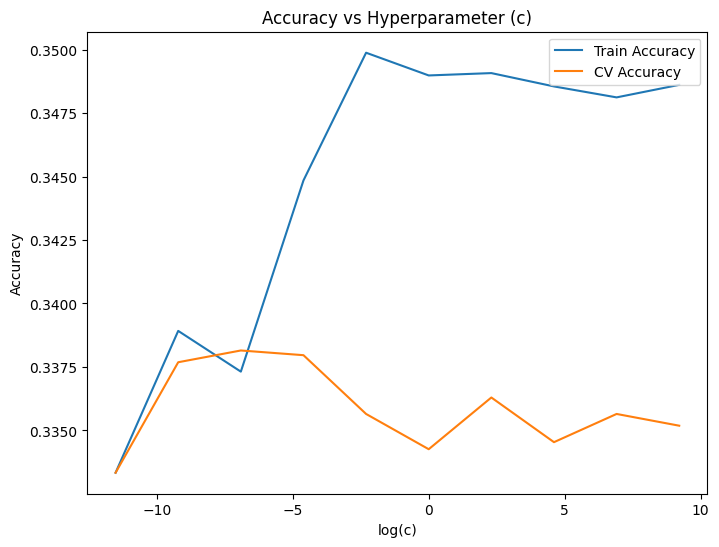

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
clf = LogisticRegression(penalty='l1',C = optimal_c, solver='liblinear')
clf.fit(X_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred_bow=clf.predict(X_train)
y_test_pred_bow = clf.predict(X_test)
y_cv_pred_bow = clf.predict(X_cv)

# Evaluate the model
train_accuracy_log= accuracy_score(y_train,y_train_pred)
test_accuracy_log = accuracy_score(y_test, y_test_pred)
cv_accuracy_log = accuracy_score(y_cv, y_cv_pred)

train_precision_log= precision_score(y_train,y_train_pred, average='micro')
test_precision_log = precision_score(y_test, y_test_pred, average='micro')
cv_precision_log = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_log= recall_score(y_train,y_train_pred, average='micro')
test_recall_log = recall_score(y_test, y_test_pred, average='micro')
cv_recall_log = recall_score(y_cv, y_cv_pred, average='micro')


In [ ]:
print(train_accuracy_log)
print(test_accuracy_log)
print(cv_accuracy_log)
print(train_precision_log)
print(test_precision_log)
print(cv_precision_log)
print(train_recall_log)
print(test_recall_log)
print(cv_recall_log)

0.3333333333333333
0.3399074074074074
0.3333333333333333
0.3333333333333333
0.3399074074074074
0.3333333333333333
0.3333333333333333
0.3399074074074074
0.3333333333333333


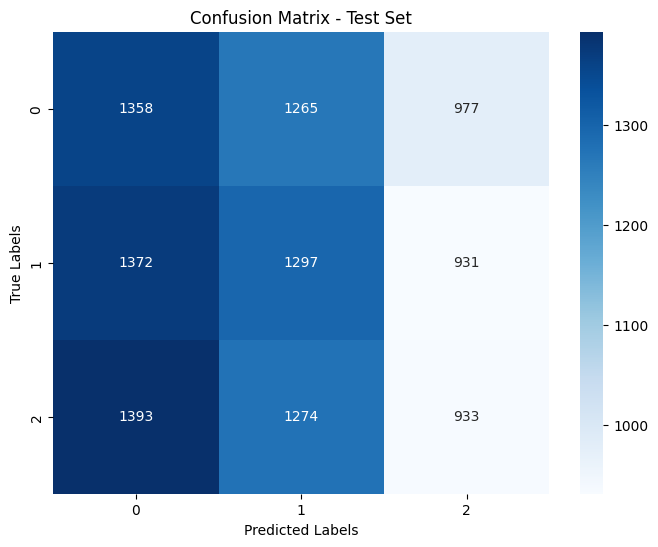

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred_bow)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:


col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']

logl1= pd.DataFrame([['log_l1',train_accuracy_log,  test_accuracy_log, cv_accuracy_log, train_precision_log, test_precision_log,  cv_precision_log, train_recall_log, test_recall_log,cv_recall_log]],columns=col)

In [ ]:
logl1

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall
0,log_l1,0.333333,0.339907,0.333333,0.333333,0.339907,0.333333,0.333333,0.339907,0.333333


# Logistic Regression L2

In [ ]:
# Train the Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



log = LogisticRegression(penalty='l2',solver='liblinear')
log.fit(X_train, y_train)

# Predict on the test set and cross-validation set
y_test_pred = log.predict(X_test)
y_cv_pred = log.predict(X_cv)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)

0.3372222222222222
0.3337037037037037
0.3372222222222222
0.3337037037037037
0.3372222222222222
0.3337037037037037


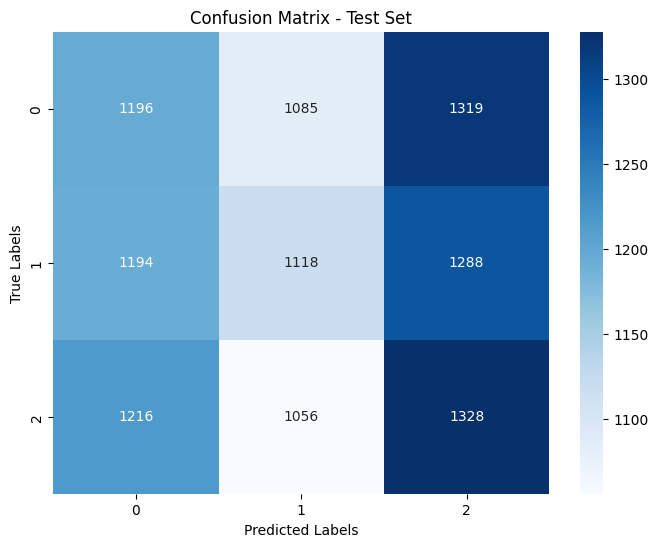

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
c= [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l2',C=i,solver='liblinear')
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_cv_pred = clf.predict(X_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred))

optimal_c= c[cv_auc.index(max(cv_auc))]
c=[math.log(x) for x in c]

In [ ]:
print(optimal_c)

100


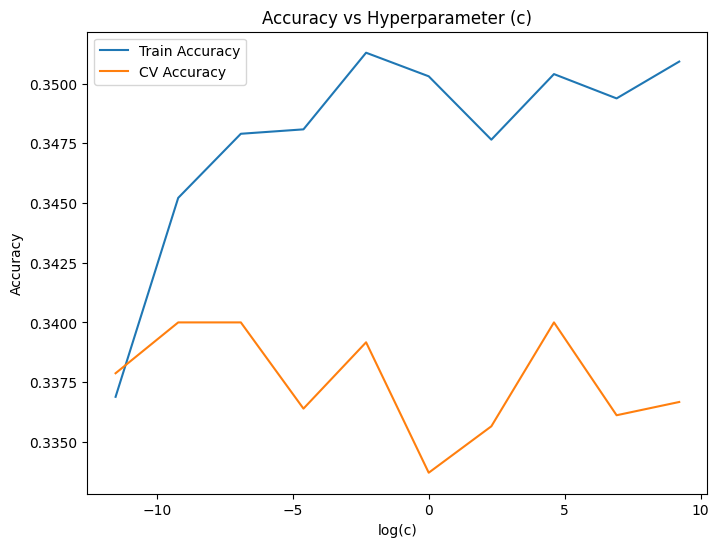

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
clf = LogisticRegression(penalty='l2',C = optimal_c, solver='liblinear')
clf.fit(X_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_cv_pred = clf.predict(X_cv)

# Evaluate the model
train_accuracy_log= accuracy_score(y_train,y_train_pred)
test_accuracy_log = accuracy_score(y_test, y_test_pred)
cv_accuracy_log = accuracy_score(y_cv, y_cv_pred)

train_precision_log= precision_score(y_train,y_train_pred, average='micro')
test_precision_log = precision_score(y_test, y_test_pred, average='micro')
cv_precision_log = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_log= recall_score(y_train,y_train_pred, average='micro')
test_recall_log = recall_score(y_test, y_test_pred, average='micro')
cv_recall_log = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(train_accuracy_log)
print(test_accuracy_log)
print(cv_accuracy_log)
print(train_precision_log)
print(test_precision_log)
print(cv_precision_log)
print(train_recall_log)
print(test_recall_log)
print(cv_recall_log)

0.35040123456790123
0.337037037037037
0.34
0.35040123456790123
0.337037037037037
0.34
0.35040123456790123
0.337037037037037
0.34


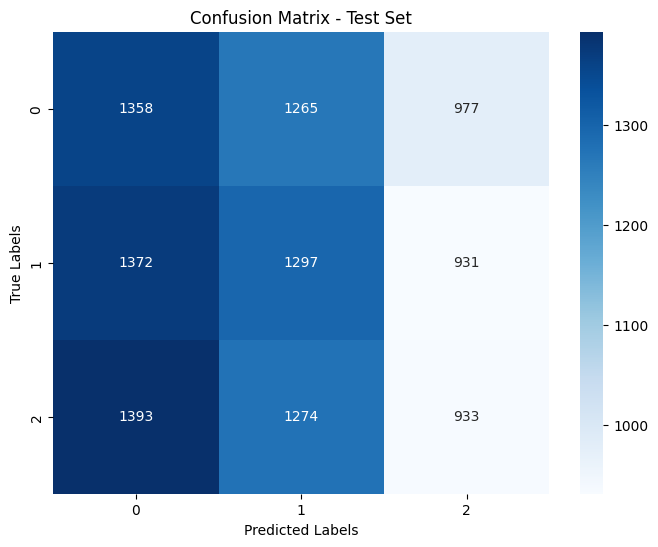

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred_bow)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']



logl2 = pd.DataFrame([['log_l2',train_accuracy_log,  test_accuracy_log, cv_accuracy_log, train_precision_log, test_precision_log,  cv_precision_log, train_recall_log, test_recall_log,cv_recall_log]],columns=col)

In [ ]:
logl2

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall
0,log_l2,0.350401,0.337037,0.34,0.350401,0.337037,0.34,0.350401,0.337037,0.34



# Logistic Regression with Elastic-Net (L1 and L2 combined)

In [ ]:
# Train the Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



log = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
log.fit(X_train, y_train)

# Predict on the test set and cross-validation set
y_test_pred = log.predict(X_test)
y_cv_pred = log.predict(X_cv)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)

0.339537037037037
0.3375
0.339537037037037
0.3375
0.339537037037037
0.3375


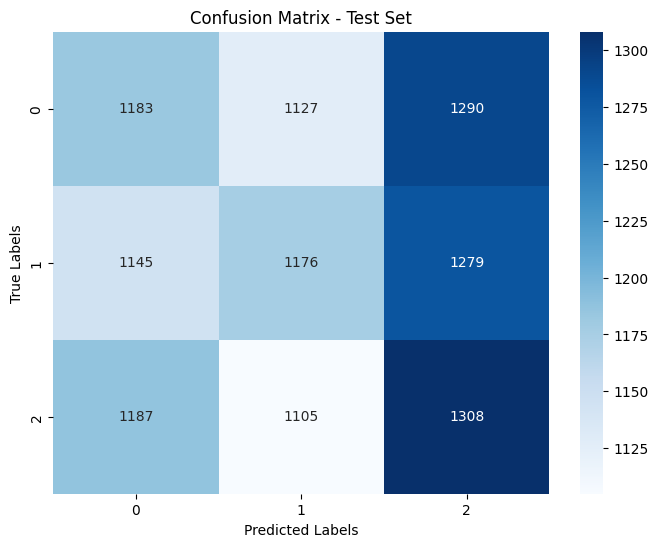

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
c= [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(C=i,penalty='elasticnet', solver='saga', l1_ratio=0.5)
    clf.fit(X_train, y_train)

    y_train_pred_bow = clf.predict(X_train)
    y_cv_pred_bow = clf.predict(X_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred))

optimal_c= c[cv_auc.index(max(cv_auc))]
c=[math.log(x) for x in c]

In [ ]:
print(optimal_c)

10000


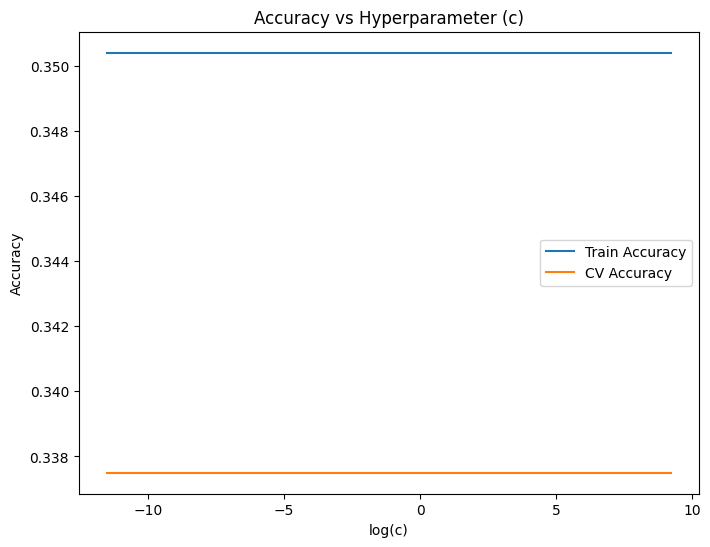

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
clf = LogisticRegression(C = optimal_c,penalty='elasticnet', solver='saga', l1_ratio=0.5)
clf.fit(X_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_cv_pred = clf.predict(X_cv)

# Evaluate the model
train_accuracy_log= accuracy_score(y_train,y_train_pred)
test_accuracy_log = accuracy_score(y_test, y_test_pred)
cv_accuracy_log = accuracy_score(y_cv, y_cv_pred)

train_precision_log= precision_score(y_train,y_train_pred, average='micro')
test_precision_log = precision_score(y_test, y_test_pred, average='micro')
cv_precision_log = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_log= recall_score(y_train,y_train_pred, average='micro')
test_recall_log = recall_score(y_test, y_test_pred, average='micro')
cv_recall_log = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(train_accuracy_log)
print(test_accuracy_log)
print(cv_accuracy_log)
print(train_precision_log)
print(test_precision_log)
print(cv_precision_log)
print(train_recall_log)
print(test_recall_log)
print(cv_recall_log)

0.34966049382716047
0.3390740740740741
0.3375
0.34966049382716047
0.3390740740740741
0.3375
0.34966049382716047
0.3390740740740741
0.3375


In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']
logl1andlogl2 = pd.DataFrame([['logl1andlogl2',train_accuracy_log,  test_accuracy_log, cv_accuracy_log, train_precision_log, test_precision_log,  cv_precision_log, train_recall_log, test_recall_log,cv_recall_log]],columns=col)

In [ ]:
logl1andlogl2

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall
0,logl1andlogl2,0.34966,0.339074,0.3375,0.34966,0.339074,0.3375,0.34966,0.339074,0.3375


In [ ]:
result=pd.DataFrame()
result=pd.concat([result,logl1,logl2,logl1andlogl2,knn,nb],ignore_index=True)
result

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,log_l1,0.333333,0.339907,0.333333,0.333333,0.339907,0.333333,0.333333,0.339907,0.333333,NaN
1,log_l2,0.350401,0.337037,0.340000,0.350401,0.337037,0.340000,0.350401,0.337037,0.340000,NaN
2,logl1andlogl2,0.349660,0.339074,0.337500,0.349660,0.339074,0.337500,0.349660,0.339074,0.337500,NaN
3,KNN,1.000000,0.611481,0.619444,1.000000,0.605103,0.612860,1.000000,0.611481,0.619444,0.601769
4,nb,0.342160,0.332037,0.336667,0.342160,0.332037,0.336667,0.342160,0.332037,0.336667,0.430054


# linear svm algorithm

In [ ]:

from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC



log = LinearSVC()
log.fit(X_train, y_train)

# Predict on the test set and cross-validation set
y_test_pred = log.predict(X_test)
y_cv_pred = log.predict(X_cv)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)

0.3373148148148148
0.3389814814814815
0.3373148148148148
0.3389814814814815
0.3373148148148148
0.3389814814814815


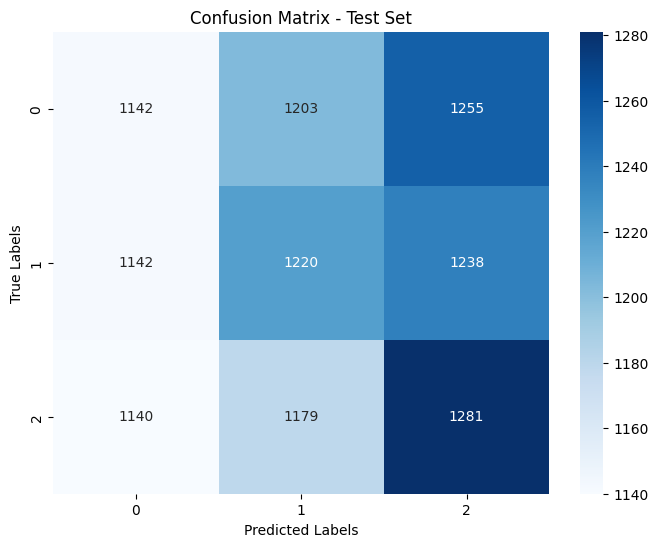

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
c= [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:

    clf = LinearSVC(C=i)
    clf.fit(X_train, y_train)

    y_train_pred_bow = clf.predict(X_train)
    y_cv_pred_bow = clf.predict(X_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred))

optimal_c= c[cv_auc.index(max(cv_auc))]
c=[math.log(x) for x in c]

In [ ]:
print(optimal_c)

10000


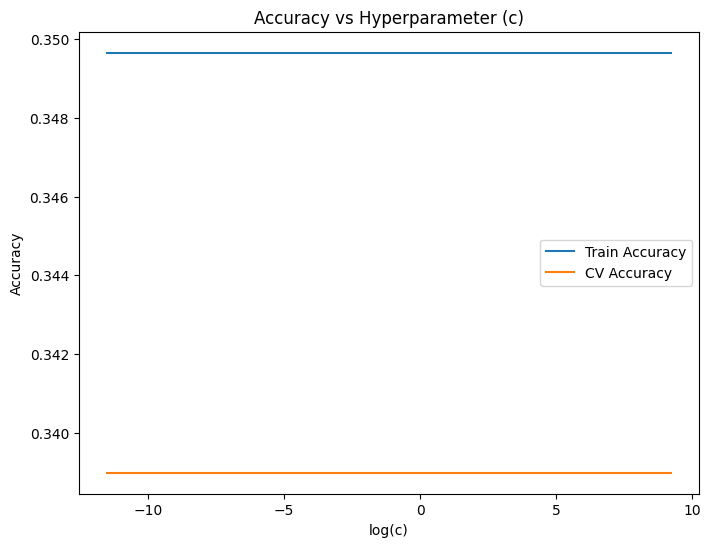

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
clf = LinearSVC(C=optimal_c)
clf.fit(X_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_cv_pred = clf.predict(X_cv)

# Evaluate the model
train_accuracy_log= accuracy_score(y_train,y_train_pred)
test_accuracy_log = accuracy_score(y_test, y_test_pred)
cv_accuracy_log = accuracy_score(y_cv, y_cv_pred)

train_precision_log= precision_score(y_train,y_train_pred, average='micro')
test_precision_log = precision_score(y_test, y_test_pred, average='micro')
cv_precision_log = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_log= recall_score(y_train,y_train_pred, average='micro')
test_recall_log = recall_score(y_test, y_test_pred, average='micro')
cv_recall_log = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(train_accuracy_log)
print(test_accuracy_log)
print(cv_accuracy_log)
print(train_precision_log)
print(test_precision_log)
print(cv_precision_log)
print(train_recall_log)
print(test_recall_log)
print(cv_recall_log)

0.34737654320987654
0.337037037037037
0.3348148148148148
0.34737654320987654
0.337037037037037
0.3348148148148148
0.34737654320987654
0.337037037037037
0.3348148148148148


In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']
linearsvm = pd.DataFrame([['linearsvm',train_accuracy_log,  test_accuracy_log, cv_accuracy_log, train_precision_log, test_precision_log,  cv_precision_log, train_recall_log, test_recall_log,cv_recall_log]],columns=col)

In [ ]:
linearsvm

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall
0,linearsvm,0.347377,0.337037,0.334815,0.347377,0.337037,0.334815,0.347377,0.337037,0.334815


# Applying RBF SVM

In [ ]:
from sklearn.svm import SVC

rbf_svm = SVC(kernel='rbf')
log.fit(X_train, y_train)

# Predict on the test set and cross-validation set
y_test_pred = log.predict(X_test)
y_cv_pred = log.predict(X_cv)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)

0.3373148148148148
0.3389814814814815
0.3373148148148148
0.3389814814814815
0.3373148148148148
0.3389814814814815


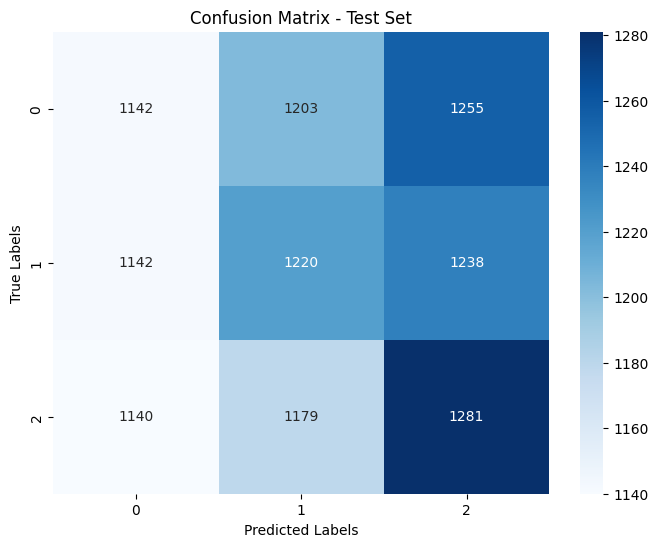

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
c= [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:

    clf = SVC(C=i,kernel='rbf')
    clf.fit(X_train, y_train)

    y_train_pred_bow = clf.predict(X_train)
    y_cv_pred_bow = clf.predict(X_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred))

optimal_c= c[cv_auc.index(max(cv_auc))]
c=[math.log(x) for x in c]

In [ ]:
print(optimal_c)

10000


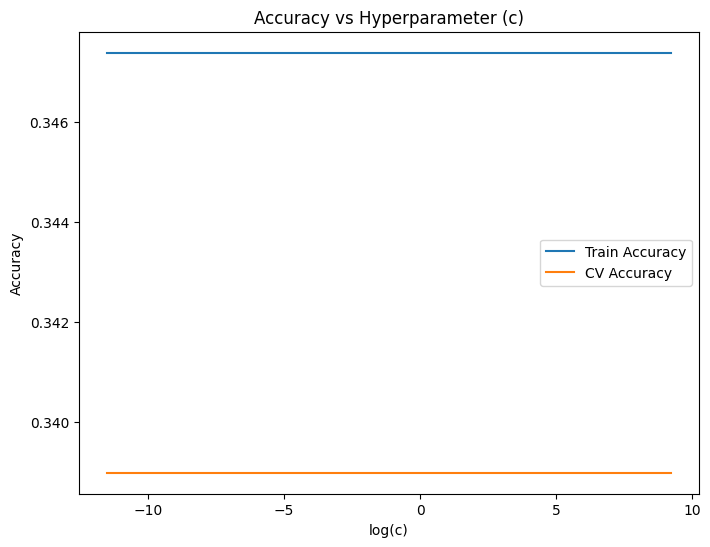

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
clf = SVC(C=optimal_c,kernel='rbf')
clf.fit(X_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_cv_pred = clf.predict(X_cv)

# Evaluate the model
train_accuracy_log= accuracy_score(y_train,y_train_pred)
test_accuracy_log = accuracy_score(y_test, y_test_pred)
cv_accuracy_log = accuracy_score(y_cv, y_cv_pred)

train_precision_log= precision_score(y_train,y_train_pred, average='micro')
test_precision_log = precision_score(y_test, y_test_pred, average='micro')
cv_precision_log = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_log= recall_score(y_train,y_train_pred, average='micro')
test_recall_log = recall_score(y_test, y_test_pred, average='micro')
cv_recall_log = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(train_accuracy_log)
print(test_accuracy_log)
print(cv_accuracy_log)
print(train_precision_log)
print(test_precision_log)
print(cv_precision_log)
print(train_recall_log)
print(test_recall_log)
print(cv_recall_log)

0.389537037037037
0.34824074074074074
0.35509259259259257
0.389537037037037
0.34824074074074074
0.35509259259259257
0.389537037037037
0.34824074074074074
0.35509259259259257


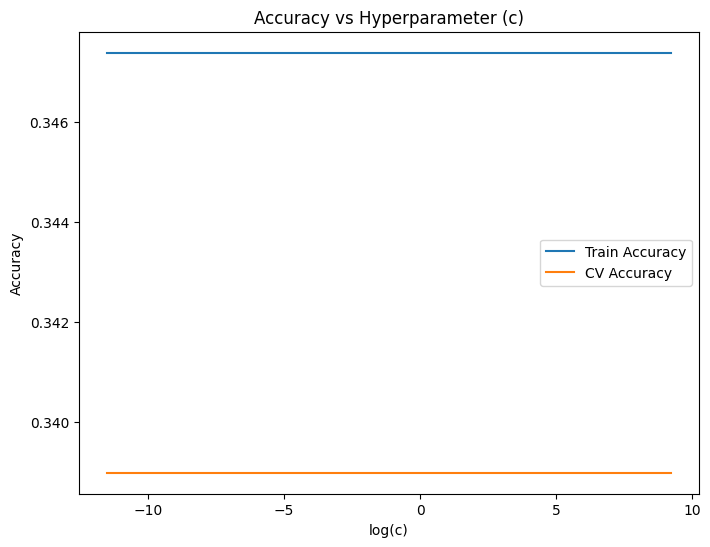

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']
RBFSVM = pd.DataFrame([['RBFSVM',train_accuracy_log,  test_accuracy_log, cv_accuracy_log, train_precision_log, test_precision_log,  cv_precision_log, train_recall_log, test_recall_log,cv_recall_log]],columns=col)

In [ ]:
RBFSVM

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall
0,RBFSVM,0.389537,0.348241,0.355093,0.389537,0.348241,0.355093,0.389537,0.348241,0.355093


In [ ]:
result=pd.DataFrame()
result=pd.concat([result,knn,nb,logl1,logl2,logl1andlogl2,linearsvm,RBFSVM],ignore_index=True)
result

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,KNN,1.000000,0.611481,0.619444,1.000000,0.605103,0.612860,1.000000,0.611481,0.619444,0.601769
1,nb,0.342160,0.332037,0.336667,0.342160,0.332037,0.336667,0.342160,0.332037,0.336667,0.430054
2,log_l1,0.333333,0.339907,0.333333,0.333333,0.339907,0.333333,0.333333,0.339907,0.333333,NaN
3,log_l2,0.350401,0.337037,0.340000,0.350401,0.337037,0.340000,0.350401,0.337037,0.340000,NaN
4,logl1andlogl2,0.349660,0.339074,0.337500,0.349660,0.339074,0.337500,0.349660,0.339074,0.337500,NaN
5,linearsvm,0.347377,0.337037,0.334815,0.347377,0.337037,0.334815,0.347377,0.337037,0.334815,NaN
6,RBFSVM,0.389537,0.348241,0.355093,0.389537,0.348241,0.355093,0.389537,0.348241,0.355093,NaN


In [ ]:
 #https://heart-attack-analysis-prediction.streamlit.app/

# Applying Decision Tree

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()

model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(X_train, y_train)

print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)


optimal min_samples_split 5
optimal max_depth 1


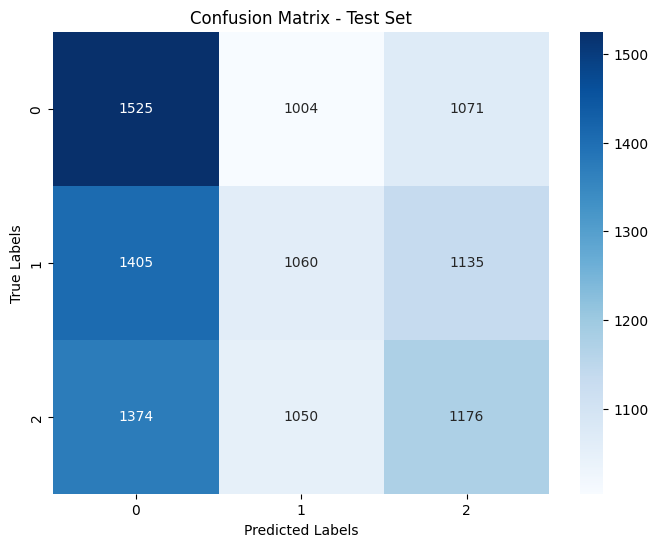

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

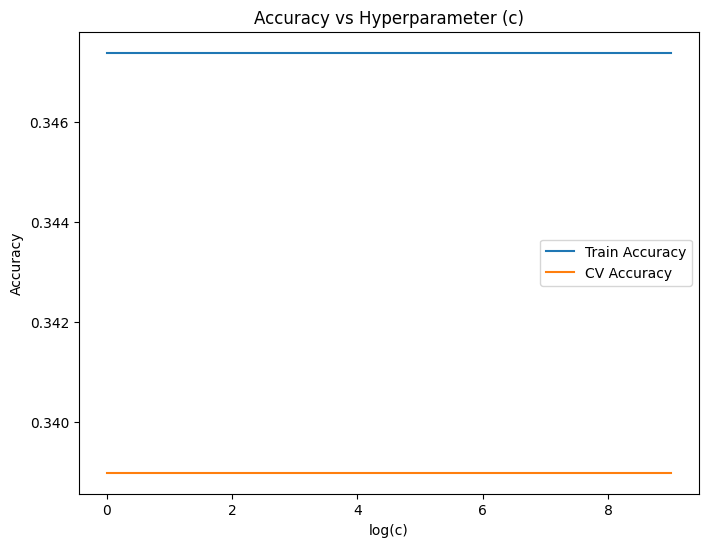

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot( train_auc, label='Train Accuracy')
plt.plot( cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

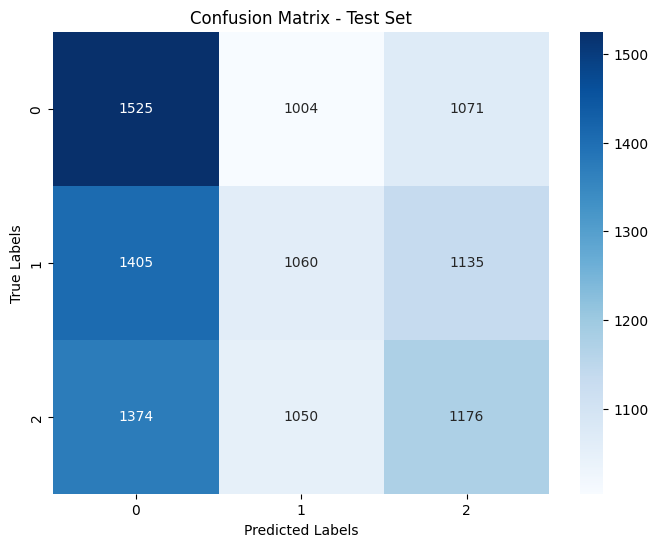

In [ ]:

#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



In [ ]:
clf = DecisionTreeClassifier(max_depth = 1,min_samples_split = 5)
clf.fit(X_train,y_train)
# Predict on the test set and cross-validation set
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_cv_pred = clf.predict(X_cv)

# Evaluate the model
train_accuracy_dt= accuracy_score(y_train,y_train_pred)
test_accuracy_dt = accuracy_score(y_test, y_test_pred)
cv_accuracy_dt = accuracy_score(y_cv, y_cv_pred)

train_precision_dt= precision_score(y_train,y_train_pred, average='micro')
test_precision_dt = precision_score(y_test, y_test_pred, average='micro')
cv_precision_dt = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_dt= recall_score(y_train,y_train_pred, average='micro')
test_recall_dt = recall_score(y_test, y_test_pred, average='micro')
cv_recall_dt = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(train_accuracy_dt)
print(test_accuracy_dt)
print(cv_accuracy_dt)
print(train_precision_dt)
print(test_precision_dt)
print(cv_precision_dt)
print(train_recall_dt)
print(test_recall_dt)
print(cv_recall_dt)

0.3350925925925926
0.33240740740740743
0.3346296296296296
0.3350925925925926
0.33240740740740743
0.3346296296296296
0.3350925925925926
0.33240740740740743
0.3346296296296296


In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']
Decisiontree = pd.DataFrame([['Decisiontree',train_accuracy_dt,  test_accuracy_dt, cv_accuracy_dt, train_precision_dt, test_precision_dt,  cv_precision_dt, train_recall_dt, test_recall_dt,cv_recall_dt]],columns=col)

In [ ]:
result=pd.DataFrame()
result=pd.concat([result,knn,nb,logl1,logl2,logl1andlogl2,linearsvm,RBFSVM,Decisiontree],ignore_index=True)
result

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,KNN,1.000000,0.611481,0.619444,1.000000,0.605103,0.612860,1.000000,0.611481,0.619444,0.601769
1,nb,0.342160,0.332037,0.336667,0.342160,0.332037,0.336667,0.342160,0.332037,0.336667,0.430054
2,log_l1,0.333333,0.339907,0.333333,0.333333,0.339907,0.333333,0.333333,0.339907,0.333333,NaN
3,log_l2,0.350401,0.337037,0.340000,0.350401,0.337037,0.340000,0.350401,0.337037,0.340000,NaN
4,logl1andlogl2,0.349660,0.339074,0.337500,0.349660,0.339074,0.337500,0.349660,0.339074,0.337500,NaN
5,linearsvm,0.347377,0.337037,0.334815,0.347377,0.337037,0.334815,0.347377,0.337037,0.334815,NaN
6,RBFSVM,0.389537,0.348241,0.355093,0.389537,0.348241,0.355093,0.389537,0.348241,0.355093,NaN
7,Decisiontree,0.335093,0.332407,0.334630,0.335093,0.332407,0.334630,0.335093,0.332407,0.334630,NaN


# Random Forest

In [ ]:

from sklearn.metrics import accuracy_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]

param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='accuracy',n_jobs=-1,cv=3)
model.fit(X_train, y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)


optimal n_estimators 120
optimal max_depth 50


In [ ]:

optimal_max_depth = model.best_estimator_.max_depth
optimal_n_estimators = model.best_estimator_.n_estimators


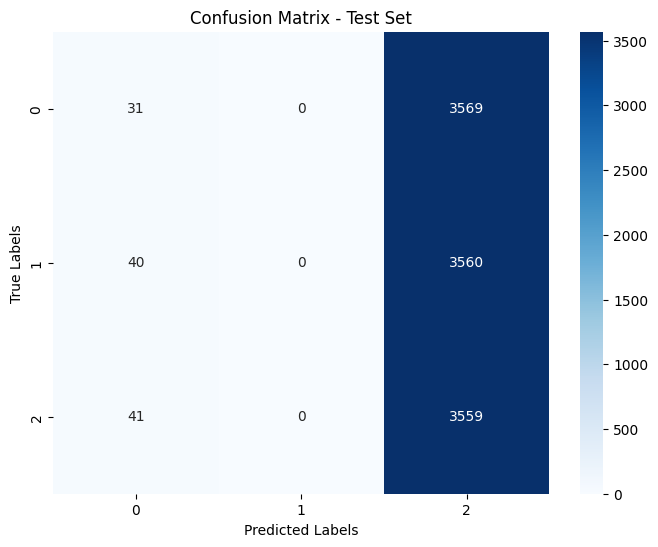

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

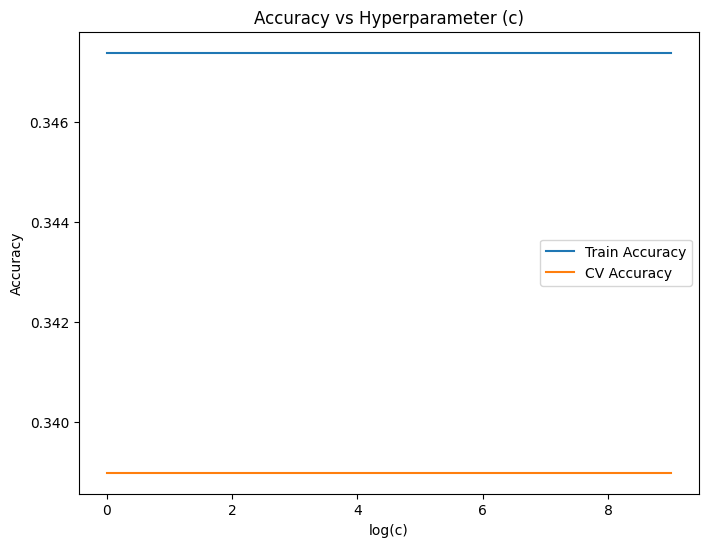

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot( train_auc, label='Train Accuracy')
plt.plot( cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(X_train, y_train)
# Predict on the test set and cross-validation set
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_cv_pred = clf.predict(X_cv)

# Evaluate the model
train_accuracy_rd= accuracy_score(y_train,y_train_pred)
test_accuracy_rd = accuracy_score(y_test, y_test_pred)
cv_accuracy_rd = accuracy_score(y_cv, y_cv_pred)

train_precision_rd= precision_score(y_train,y_train_pred, average='micro')
test_precision_rd = precision_score(y_test, y_test_pred, average='micro')
cv_precision_rd = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_rd= recall_score(y_train,y_train_pred, average='micro')
test_recall_rd = recall_score(y_test, y_test_pred, average='micro')
cv_recall_rd = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(train_accuracy_rd)
print(test_accuracy_rd)
print(cv_accuracy_rd)
print(train_precision_rd)
print(test_precision_rd)
print(cv_precision_rd)
print(train_recall_rd)
print(test_recall_rd)
print(cv_recall_rd)

1.0
0.6641666666666667
0.669537037037037
1.0
0.6641666666666667
0.669537037037037
1.0
0.6641666666666667
0.669537037037037


In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']
Randomforest = pd.DataFrame([['Randomforest',train_accuracy_rd,  test_accuracy_rd, cv_accuracy_rd, train_precision_rd, test_precision_rd,  cv_precision_rd, train_recall_rd, test_recall_rd,cv_recall_rd]],columns=col)

In [ ]:
Randomforest

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall
0,Randomforest,1.0,0.664167,0.669537,1.0,0.664167,0.669537,1.0,0.664167,0.669537


In [ ]:
result=pd.DataFrame()
result=pd.concat([result,knn,nb,logl1,logl2,logl1andlogl2,linearsvm,RBFSVM,Decisiontree,Randomforest],ignore_index=True)
result

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,KNN,1.000000,0.611481,0.619444,1.000000,0.605103,0.612860,1.000000,0.611481,0.619444,0.601769
1,nb,0.342160,0.332037,0.336667,0.342160,0.332037,0.336667,0.342160,0.332037,0.336667,0.430054
2,log_l1,0.333333,0.339907,0.333333,0.333333,0.339907,0.333333,0.333333,0.339907,0.333333,NaN
3,log_l2,0.350401,0.337037,0.340000,0.350401,0.337037,0.340000,0.350401,0.337037,0.340000,NaN
4,logl1andlogl2,0.349660,0.339074,0.337500,0.349660,0.339074,0.337500,0.349660,0.339074,0.337500,NaN
5,linearsvm,0.347377,0.337037,0.334815,0.347377,0.337037,0.334815,0.347377,0.337037,0.334815,NaN
6,RBFSVM,0.389537,0.348241,0.355093,0.389537,0.348241,0.355093,0.389537,0.348241,0.355093,NaN
7,Decisiontree,0.335093,0.332407,0.334630,0.335093,0.332407,0.334630,0.335093,0.332407,0.334630,NaN
8,Randomforest,1.000000,0.664167,0.669537,1.000000,0.664167,0.669537,1.000000,0.664167,0.669537,NaN
